# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [6]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [8]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [9]:
# Create a Beautiful Soup Object
html = browser.html
mars_weather_data = soup(html, 'html.parser')


In [10]:
# Extract all rows of data
# Find the table element that contains the rows
table = mars_weather_data.find('table')

# Find all table rows (excluding the header row)
rows = table.find_all('tr')[1:]

# Iterate over the rows and extract the data
data = []
for row in rows:
    # Find all table cells in the row
    cells = row.find_all('td')
    
    # Extract the text content of each cell and append to the data list
    row_data = [cell.text for cell in cells]
    data.append(row_data)

# Print the extracted data
for row_data in data:
    print(row_data)


['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0']
['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0']
['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0']
['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0']
['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0']
['172', '2012-09-05', '

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [11]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
# Create an empty list to store the rows
rows = []

# Loop through the scraped data to create a list of rows
for data_row in mars_weather_data.findAll('tr')[1:]:
    # Extract the data from each cell in the row
    cells = data_row.findAll('td')
    row = {
        'id': cells[0].text,
        'terrestrial_date': cells[1].text,
        'sol': cells[2].text,
        'ls': cells[3].text,
        'month': cells[4].text,
        'min_temp': cells[5].text,
        'pressure': cells[6].text
    }
    # Append the row to the list
    rows.append(row)

# Create a list of column names
column_names = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

# Create a Pandas DataFrame using the list of rows and column names
weather_df = pd.DataFrame(rows, columns=column_names)

# Print the DataFrame
print(weather_df)


        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


In [12]:
# Confirm DataFrame was created successfully
weather_df.head()


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [15]:
# Examine the data type of each column
print(weather_df.dtypes)


id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [13]:
# Change data types for data analysis
weather_df['terrestrial_date'] = pd.to_datetime(weather_df['terrestrial_date'])
weather_df['sol'] = weather_df['sol'].astype(int)
weather_df['ls'] = weather_df['ls'].astype(float)
weather_df['month'] = weather_df['month'].astype(int)
weather_df['min_temp'] = weather_df['min_temp'].astype(float)
weather_df['pressure'] = weather_df['pressure'].astype(float)


In [14]:
# Confirm type changes were successful by examining data types again
# Verify the updated data types
print(weather_df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                         float64
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [15]:
# Count the occurrences of each unique month and sort them by month number
month_counts = weather_df['month'].value_counts().sort_index()

# Print the result
print(month_counts)



1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64


In [16]:
# Calculate the number of unique Martian days (sols) in the dataset
num_sols = len(weather_df['sol'].unique())

# Print the number of Martian days' worth of data
print(f"Number of Martian days' worth of data: {num_sols}")




Number of Martian days' worth of data: 1867


In [17]:
# Calculate the average low temperature by month
average_low_temp = weather_df.groupby('month')['min_temp'].mean()

# Print the average low temperature by month
print(average_low_temp)



month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


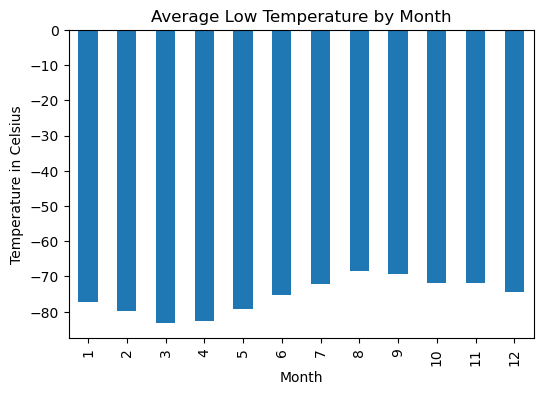

In [18]:
# Plot the average temperature by month
average_low_temp.plot(kind='bar', figsize=(6, 4))

# Set the title, x-axis label, and y-axis label
plt.title('Average Low Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')

# Rotate the x-axis tick labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()



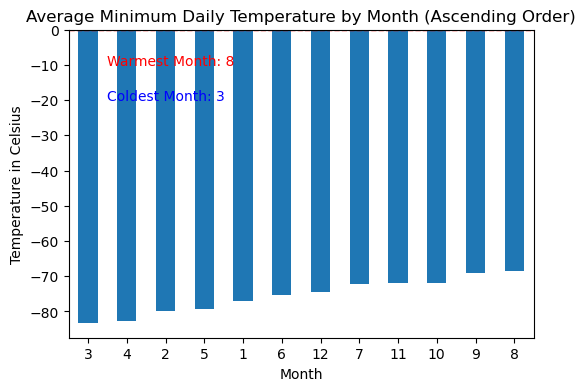

In [19]:
# Identify the coldest and hottest months in Curiosity's location

# Calculate average minimum daily temperature by month
average_min_temp = weather_df.groupby('month')['min_temp'].mean()

# Sort the average minimum temperatures in ascending order
average_min_temp_sorted = average_min_temp.sort_values(ascending=True)

# Find the coldest and warmest months
coldest_month = average_min_temp_sorted.idxmin()
warmest_month = average_min_temp_sorted.idxmax()

# Plot the results as a bar chart in ascending order
average_min_temp_sorted.plot(kind='bar', figsize=(6, 4))
plt.title('Average Minimum Daily Temperature by Month (Ascending Order)')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.xticks(rotation=0)
plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Add a horizontal line at 0°C
plt.text(0.5, -20, f'Coldest Month: {coldest_month}', color='blue')
plt.text(0.5, -10, f'Warmest Month: {warmest_month}', color='red')
plt.show()


In [20]:
# 4. Average pressure by Martian month
# Calculate the average pressure by month
average_pressure = weather_df.groupby('month')['pressure'].mean()

# Print the result
print(average_pressure)


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


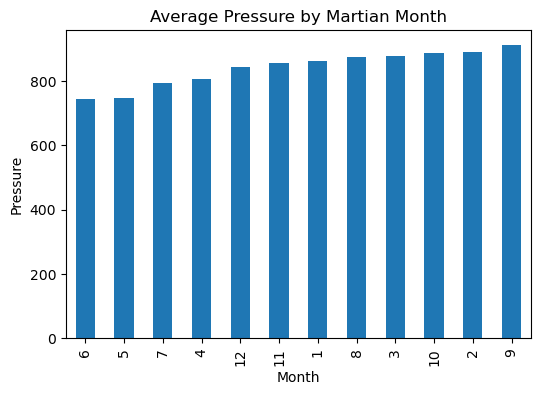

In [23]:
# Plot the average pressure by month
# Calculate the average pressure by month
average_pressure = weather_df.groupby('month')['pressure'].mean()

# Sort the average pressure in ascending order
average_pressure = average_pressure.sort_values()

# Plot the average pressure in ascending order
average_pressure.plot(kind='bar', figsize=(6, 4))
plt.title('Average Pressure by Martian Month')
plt.xlabel('Month')
plt.ylabel('Pressure')
plt.xticks(rotation=90)
plt.show()


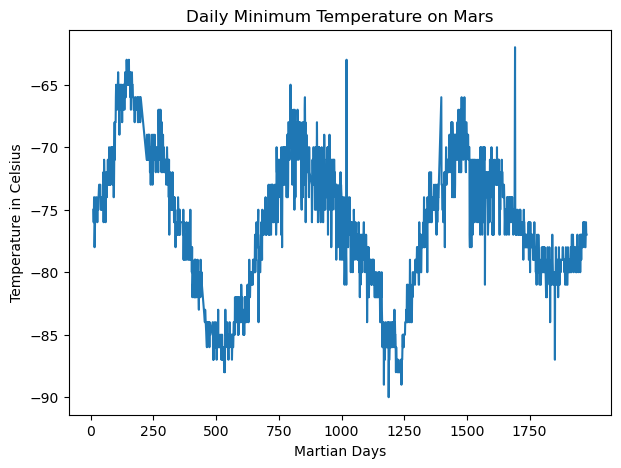

In [21]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# Plot the daily minimum temperature
plt.figure(figsize=(7, 5))
plt.plot(weather_df['sol'], weather_df['min_temp'])
plt.title('Daily Minimum Temperature on Mars')
plt.xlabel('Martian Days')
plt.ylabel('Temperature in Celsius')
plt.xticks([0, 250, 500, 750, 1000, 1250, 1500, 1750])
plt.show()


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!

Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [96]:
# Write the data to a CSV
df.to_csv('mars_data.csv', index=False)


In [22]:
browser.quit()